## Control Óptimo 

In [ ]:
!pip install gekko

$ max \int_0^{10} (E-\frac{c}{x})u \cdot U_{max} \; \; dt $ \\
sujeto a: \\
$ \frac{dx}{dt}= rx(t)(1-\frac{x(t)}{k})-u \cdot U_{max} $ \\
x(0)= 70 \\
$ 0 \leq u(t) \leq 1 $

Optimal profit:  106.90608357


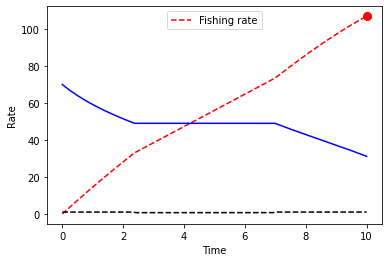

In [ ]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creamos el modelo 
c_op = GEKKO()

# Puntos de nuestra partición
n=500
c_op.time = np.linspace(0,10,n)

# Parámetros
E,c,r,k,U_max = 1,17.5,0.71,80.5,20

# Tasa de pesca
u = c_op.MV(value=1,lb=0,ub=1)
u.STATUS = 1
u.DCOST = 0

# Población inicial de peces
x = c_op.Var(value=70) 

# Ecuación dinámica (evolución población de peces)
c_op.Equation(x.dt() == r*x*(1-x/k)-u*U_max)

J = c_op.Var(value=0) # Objetivo (ganancia/utilidad)
Jf = c_op.FV() 
Jf.STATUS = 1
c_op.Connection(Jf,J,pos2='end')
c_op.Equation(J.dt() == (E-c/x)*u*U_max)
c_op.Obj(-Jf) # maximize profit

# Control Óptimo
c_op.options.IMODE = 6  
c_op.options.NODES = 3  
c_op.options.SOLVER = 3 

#Resolvemos el problema de optimización 
c_op.solve(disp=False) 

print('Optimal profit:  ' + str(Jf.value[0]))


# Gráficos de los resultados
plt.plot(c_op.time,J.value,'r--')
plt.plot(c_op.time[-1],Jf.value[0],'ro',markersize=8)
plt.plot(c_op.time,x.value,'b-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Profit','Final profit= '+str(Jf.value[0]),'Fish population'],loc ="upper left")

plt.plot(c_op.time,u.value,'k--')
plt.ylabel('Rate')
plt.xlabel('Time')
plt.legend(['Fishing rate'],loc="upper center")
plt.show()